In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

merged_all = pd.read_csv('merged_all_final.csv')

In [2]:
import numpy as np

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

excel_file = 'C:/Users/Samae/Desktop/merged_all.csv'

# Read all sheets into a dictionary of dataframes
merged_all = pd.read_csv(excel_file)

In [3]:
merged_all

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,0.000000,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654,cycling
1,0.017690,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704,cycling
2,0.217690,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595,cycling
3,0.417690,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168,cycling
4,0.617690,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132,cycling
...,...,...,...,...,...,...,...,...,...,...
11270,543.944153,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821,bus
11271,544.151993,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921,bus
11272,544.359833,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283,bus
11273,544.567672,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864,bus


In [131]:
#save merged_all to csv file
merged_all.to_csv('merged_all_final.csv', index=False)

Data Exploration 

In [2]:
#describe the data
merged_all.describe()

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed
count,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000
mean,98.531907,0.806973,5.597125,3.296152,-0.003221,-0.002661,0.001201,1000.165421,0.052491
std,132.392486,2.455903,4.892970,3.677989,0.636855,0.664277,0.746203,2.719261,0.954707
min,0.000000,-11.222291,-21.129211,-21.007603,-7.539942,-10.884785,-8.746300,995.091437,-3.254816
25%,18.228093,-0.538086,1.445393,1.340672,-0.045050,-0.061161,-0.047819,997.759369,-0.770860
50%,35.882952,0.076869,9.072686,2.396113,0.001222,0.000916,-0.000076,1000.113122,0.036681
75%,126.692389,2.040510,9.616455,4.563137,0.046501,0.070362,0.055322,1002.534128,0.866771
max,544.779470,28.539904,16.442579,29.992237,13.271033,6.964126,9.688485,1004.943898,3.368304


In [3]:
merged_all

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,0.000000,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654,cycling
1,0.017690,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704,cycling
2,0.217690,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595,cycling
3,0.417690,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168,cycling
4,0.617690,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132,cycling
...,...,...,...,...,...,...,...,...,...,...
11270,543.944153,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821,bus
11271,544.151993,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921,bus
11272,544.359833,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283,bus
11273,544.567672,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864,bus


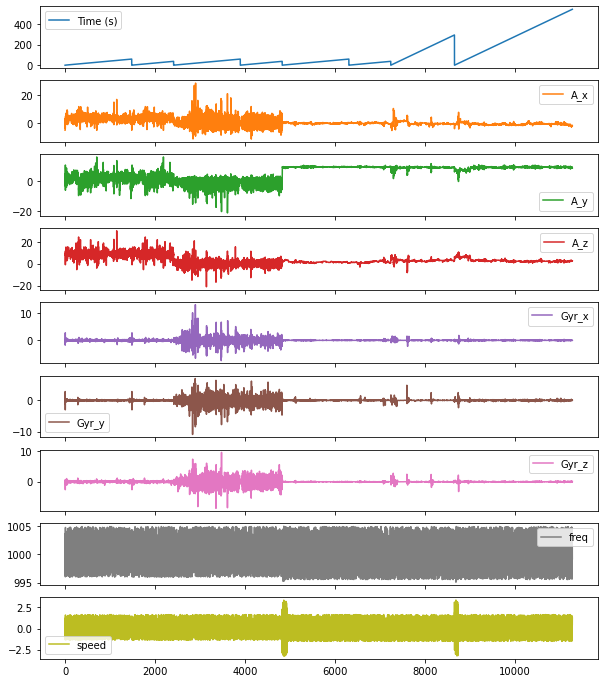

In [4]:
#plot the data
merged_all.plot(subplots=True, figsize=(10,12))
plt.show()


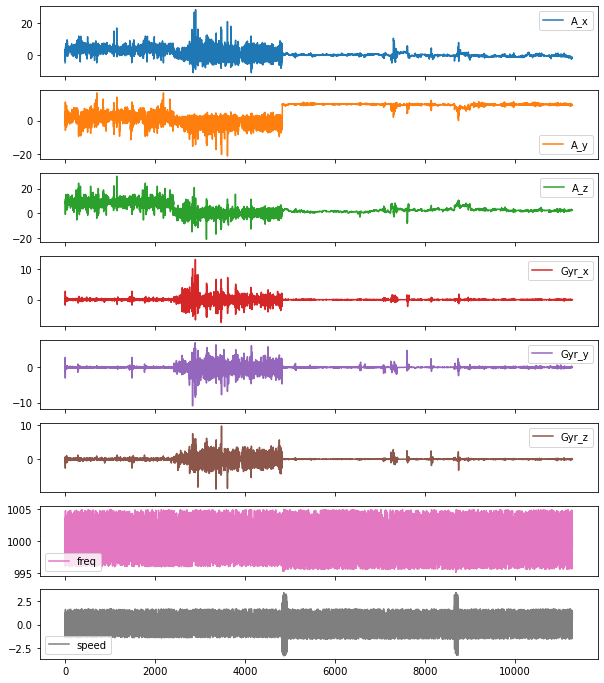

In [53]:
#plot it without time
merged_all.drop('Time (s)', axis=1).plot(subplots=True, figsize=(10,12))
plt.show()

In [54]:
merged_all.isnull().sum()

Time (s)    0
A_x         0
A_y         0
A_z         0
Gyr_x       0
Gyr_y       0
Gyr_z       0
freq        0
speed       0
state       0
dtype: int64

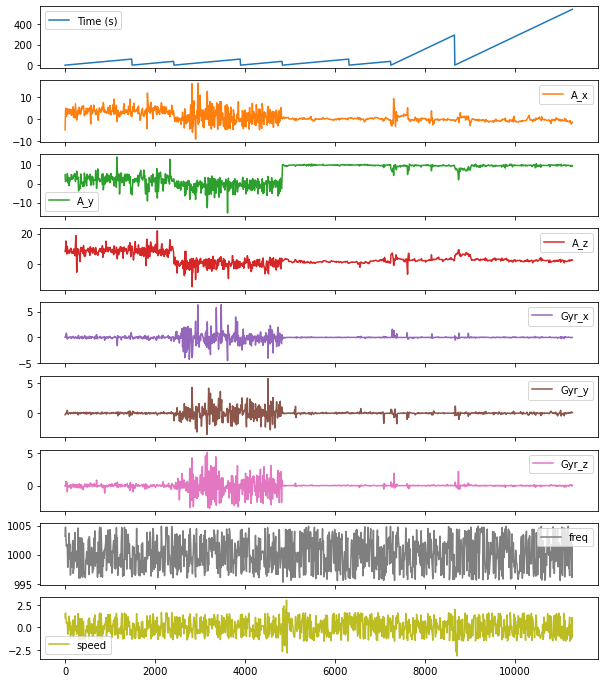

In [55]:
#plot the data with stepsize of 10
merged_all.iloc[::10].plot(subplots=True, figsize=(10,12))
plt.show()


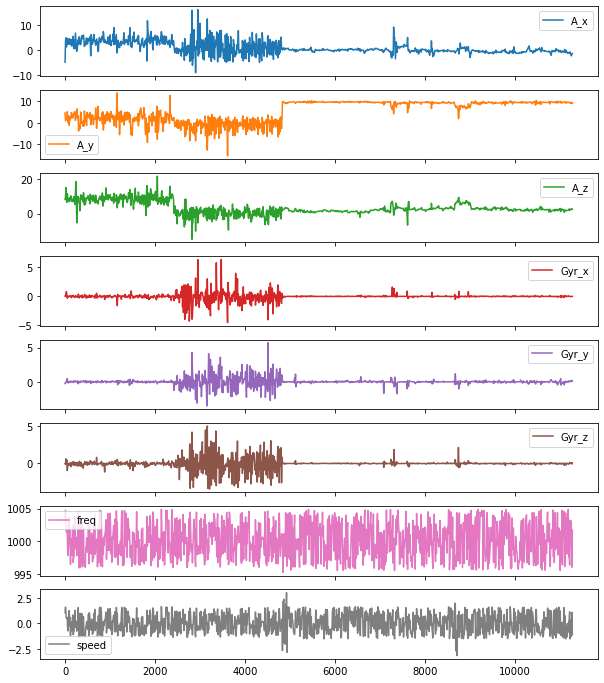

In [56]:
#do the same with the data without time
merged_all.drop('Time (s)', axis=1).iloc[::10].plot(subplots=True, figsize=(10,12))
plt.show()


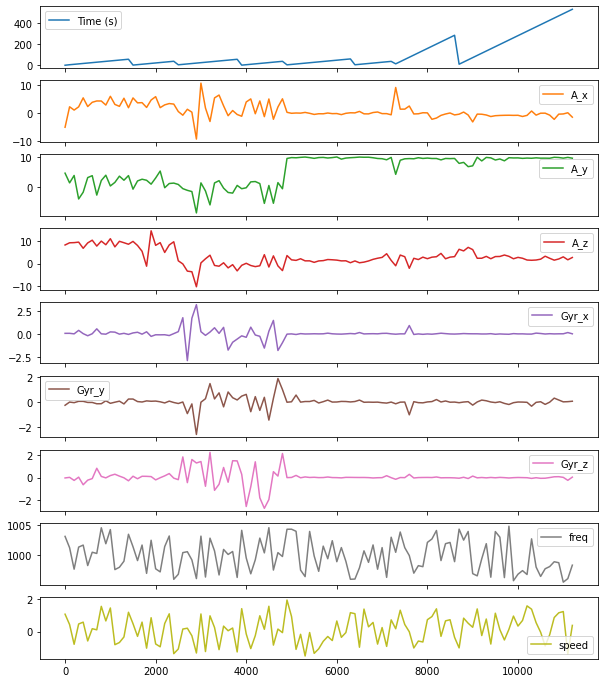

In [57]:
#plot the data with stepsize of 10
merged_all.iloc[::100].plot(subplots=True, figsize=(10,12))
plt.show()


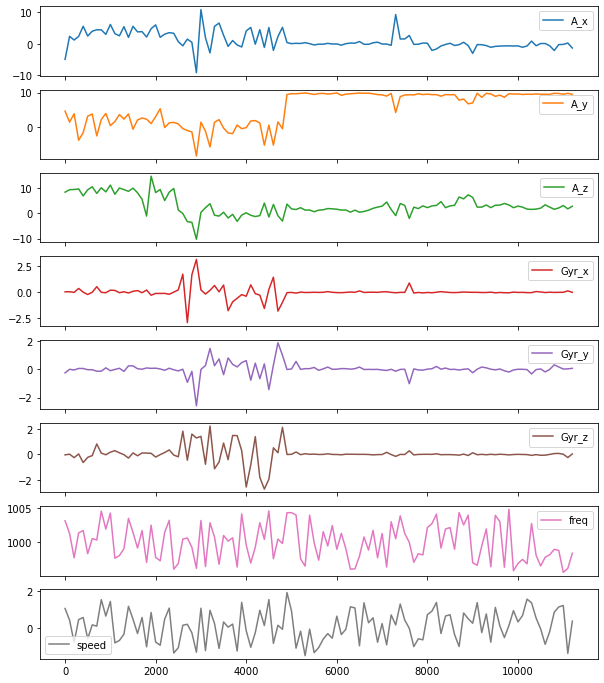

In [58]:
merged_all.drop('Time (s)', axis=1).iloc[::100].plot(subplots=True, figsize=(10,12))
plt.show()

In [59]:
#show percentage of cases for each class
merged_all['state'].value_counts(normalize=True) * 100


bus        35.796009
cycling    21.401330
walking    21.401330
metro      21.401330
Name: state, dtype: float64

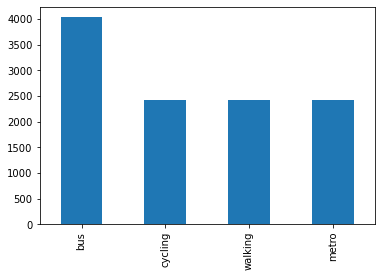

In [60]:
#show distribution of each class
merged_all['state'].value_counts().plot(kind='bar')
plt.show()


Data preparation 

In [4]:
df_outlier = merged_all.drop('Time (s)', axis=1)
df_outlier

,A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654,cycling
1,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704,cycling
2,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595,cycling
3,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168,cycling
4,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132,cycling
...,...,...,...,...,...,...,...,...,...
11270,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821,bus
11271,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921,bus
11272,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283,bus
11273,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864,bus


In [5]:
#remove column state from dataframe and call new dataframe df_outlier
df_outlier = df_outlier.drop('state', axis=1)
df_outlier


,A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed
0,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654
1,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704
2,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595
3,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168
4,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132
...,...,...,...,...,...,...,...,...
11270,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821
11271,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921
11272,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283
11273,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864


In [7]:
#create dataframe with only A_x data 
df_A_x = merged_all[['A_x']]
df_A_x
df_A_y = merged_all[['A_y']]
df_A_y
df_A_z = merged_all[['A_z']]
df_A_z
df_Gyr_x = merged_all[['Gyr_x']]
df_Gyr_x
df_Gyr_y = merged_all[['Gyr_y']]
df_Gyr_y
df_Gyr_z = merged_all[['Gyr_z']]
df_Gyr_z
df_freq = merged_all[['freq']]
df_freq
df_speed = merged_all[['speed']]
df_speed

,speed
0,1.074654
1,-0.691704
2,-1.068595
3,-0.309168
4,0.808132
...,...
11270,-1.108821
11271,0.960921
11272,0.393283
11273,0.395864


In [21]:
import numpy as np

###chauvenet with normal distribution asusmption 

def chauvenet(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
     # Calculate the critical value based on the normal distribution
    p = 1 / (2 * n)  # Probability threshold
    critical_value = -np.log10(p)
    # Calculate the absolute deviations from the mean
    abs_deviations = np.abs(data - mean)

    # Calculate the z-scores for each data point
    z_scores = abs_deviations / std_dev

    # Calculate the probability of each data point being an outlier
    probabilities = 2 * (1 - np.exp(-0.5 * z_scores**2))  # Two-tailed test

    # Check if each data point is an outlier based on the probability
    is_outlier = probabilities < critical_value

    return is_outlier

In [23]:
data = df_A_x  # Sample data
outliers = chauvenet(df_A_x)
print(outliers)

        A_x
0      True
1      True
2      True
3      True
4      True
...     ...
11270  True
11271  True
11272  True
11273  True
11274  True

[11275 rows x 1 columns]


/Users/juliagerbing/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [38]:
#show how many outliers are there
outliers.value_counts()


Time (s)  A_x   A_y   A_z   Gyr_x  Gyr_y  Gyr_z  freq  speed
True      True  True  True  True   True   True   True  True     11275
dtype: int64

In [24]:
import numpy as np
from scipy.stats import t

#chauvenet with student t 

def chauvenet(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)

    # Calculate the critical value based on the t-distribution
    p = 1 / (2 * n)  # Probability threshold
    degrees_of_freedom = n - 1
    critical_value = t.ppf(1 - p, degrees_of_freedom)

    # Calculate the absolute deviations from the mean
    abs_deviations = np.abs(data - mean)

    # Calculate the t-scores for each data point
    t_scores = abs_deviations / std_dev

    # Calculate the probability of each data point being an outlier
    probabilities = 2 * (1 - t.cdf(t_scores, degrees_of_freedom))

    # Check if each data point is an outlier based on the probability
    is_outlier = probabilities < critical_value

    return is_outlier

In [25]:
data = df_A_x  
outliers = chauvenet(data)
print(outliers)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


/Users/juliagerbing/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [113]:
from sklearn.neighbors import LocalOutlierFactor

In [114]:
lof = LocalOutlierFactor(n_neighbors=10) 

In [115]:
lof.fit(df_speed)

LocalOutlierFactor(n_neighbors=10)

In [116]:
outlier_scores = lof.negative_outlier_factor_

In [123]:
threshold = -10# Adjust this threshold based on your dataset and desired sensitivity -3
outliers = df_speed[outlier_scores < threshold]

In [124]:
outliers

,speed
4863,-1.610518
4885,-1.588078
4894,-1.612350
4904,1.672656
4932,1.718163
4933,-1.595257
8691,1.734385
8692,1.762175
8697,1.696637
8733,1.698100


In [81]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

def detect_outliers(data, negative_threshold, positive_threshold):
    lof = LocalOutlierFactor(n_neighbors=10)
    lof.fit(data)
    outlier_scores = lof.negative_outlier_factor_

    negative_outliers = data[outlier_scores < negative_threshold]
    positive_outliers = data[outlier_scores > positive_threshold]

    return negative_outliers, positive_outliers

# Example usage
data =  df_A_x
negative_threshold = -12
positive_threshold = 30

negative_outliers, positive_outliers = detect_outliers(data, negative_threshold, positive_threshold)

print("Negative Outliers:")
print(negative_outliers)
print("Positive Outliers:")
print(positive_outliers)

Negative Outliers:
Empty DataFrame
Columns: [A_x]
Index: []
Positive Outliers:
Empty DataFrame
Columns: [A_x]
Index: []


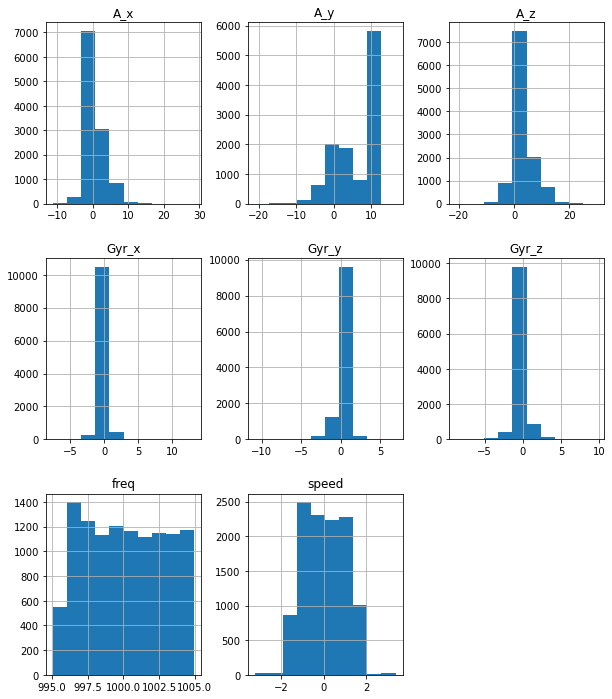

In [75]:
#show distribution of each feature of df_outlier
df_outlier.hist(figsize=(10,12))
plt.show()


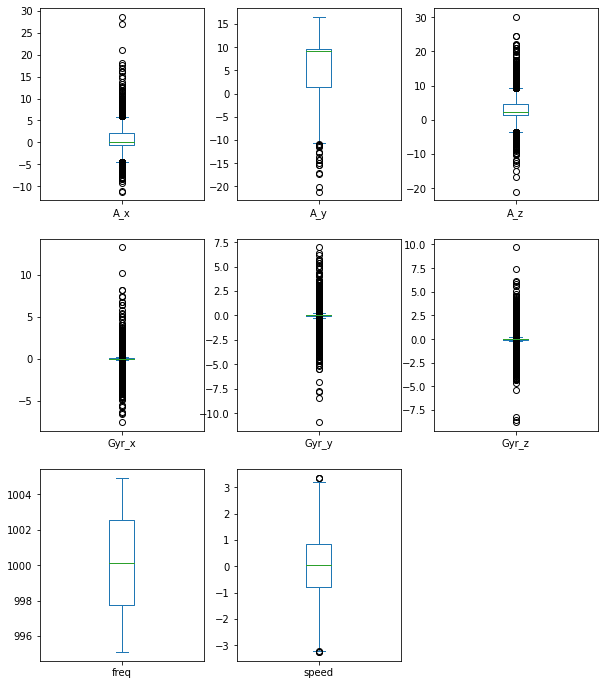

In [76]:
#show boxplot of each feature of df_outlier
df_outlier.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,12))
plt.show()


In [78]:
lof = LocalOutlierFactor(n_neighbors=10) 
lof.fit(df_A_x)
outlier_scores = lof.negative_outlier_factor_
threshold = -2.5  # Adjust this threshold based on your dataset and desired sensitivity
outliers = data[outlier_scores < threshold]

In [125]:
df_outlier


,A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed
0,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654
1,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704
2,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595
3,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168
4,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132
...,...,...,...,...,...,...,...,...
11270,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821
11271,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921
11272,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283
11273,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864


In [135]:
#apply PCA to df_outlier
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(df_outlier)
df_outlier_pca = pca.transform(df_outlier)
df_outlier_pca


array([[ 1.04735479,  2.70158747,  3.15044761, ...,  0.46724682,
         0.33740013,  0.36908892],
       [ 0.94704487,  2.76471547, -2.28793275, ...,  1.18482509,
        -0.53019277,  0.2058162 ],
       [ 1.04466611,  2.91802495, -3.44455041, ...,  0.35155865,
        -0.54499516, -0.80513267],
       ...,
       [-4.29290552,  0.03888815,  3.19192489, ..., -0.04563039,
        -0.24092054,  0.04902678],
       [-4.21678836,  0.08480816,  1.26540654, ...,  0.18147318,
         0.1053632 ,  0.07355474],
       [-4.13157539, -0.04543104, -0.606357  , ...,  0.24260668,
         1.33698166,  0.12026304]])

In [136]:
df_outlier_pca

array([[ 1.04735479,  2.70158747,  3.15044761, ...,  0.46724682,
         0.33740013,  0.36908892],
       [ 0.94704487,  2.76471547, -2.28793275, ...,  1.18482509,
        -0.53019277,  0.2058162 ],
       [ 1.04466611,  2.91802495, -3.44455041, ...,  0.35155865,
        -0.54499516, -0.80513267],
       ...,
       [-4.29290552,  0.03888815,  3.19192489, ..., -0.04563039,
        -0.24092054,  0.04902678],
       [-4.21678836,  0.08480816,  1.26540654, ...,  0.18147318,
         0.1053632 ,  0.07355474],
       [-4.13157539, -0.04543104, -0.606357  , ...,  0.24260668,
         1.33698166,  0.12026304]])

In [137]:
#make table with PCA data
df_outlier_pca = pd.DataFrame(df_outlier_pca)
df_outlier_pca


,0,1,2,3,4,5,6
0,1.047355,2.701587,3.150448,-7.093746,0.467247,0.337400,0.369089
1,0.947045,2.764715,-2.287933,-6.588342,1.184825,-0.530193,0.205816
2,1.044666,2.918025,-3.444550,-5.520131,0.351559,-0.544995,-0.805133
3,1.651599,4.952748,-1.086856,-4.809278,-2.157407,0.221704,-1.013521
4,6.208225,5.088393,2.253496,-0.015916,-0.960712,0.471736,-1.102083
...,...,...,...,...,...,...,...
11270,-4.174962,0.081029,1.419578,-1.332125,-0.298112,-1.398696,0.059596
11271,-4.490273,0.270315,-3.164190,-1.313713,0.335077,1.549402,0.034325
11272,-4.292906,0.038888,3.191925,-1.251973,-0.045630,-0.240921,0.049027
11273,-4.216788,0.084808,1.265407,-1.397946,0.181473,0.105363,0.073555


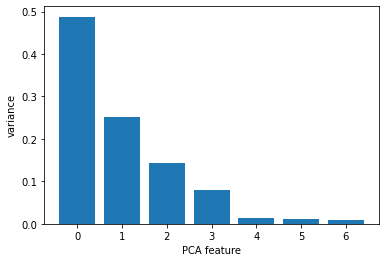

In [138]:
#plot principal components in bar chart 
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(range(pca.n_components_))
plt.show()


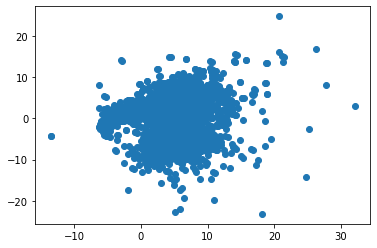

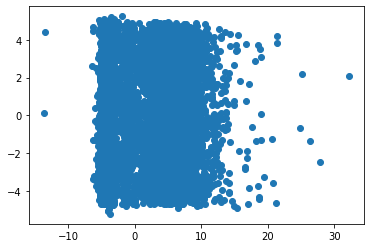

In [142]:
#plot scatter plot for each principal component
plt.scatter(df_outlier_pca[0], df_outlier_pca[1])
plt.show()

plt.scatter(df_outlier_pca[0], df_outlier_pca[2])
plt.show()




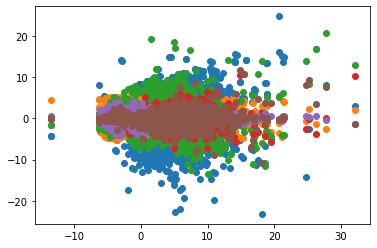

In [143]:
#plot scatterplot with all principal components
plt.scatter(df_outlier_pca[0], df_outlier_pca[1])
plt.scatter(df_outlier_pca[0], df_outlier_pca[2])
plt.scatter(df_outlier_pca[0], df_outlier_pca[3])
plt.scatter(df_outlier_pca[0], df_outlier_pca[4])
plt.scatter(df_outlier_pca[0], df_outlier_pca[5])
plt.scatter(df_outlier_pca[0], df_outlier_pca[6])
plt.show()

In [14]:
#show percentage of variance explained by each principal component
pca.explained_variance_ratio_


array([0.48792611, 0.25088465, 0.14352083, 0.0792714 , 0.01291395,
       0.01219483, 0.00884097, 0.00444727])

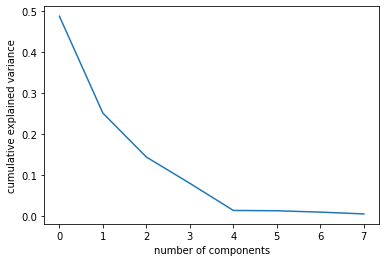

In [10]:
#plot eigenvalues
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


Machine Learning 

In [130]:
import numpy as np
import matplotlib.pyplot as plt

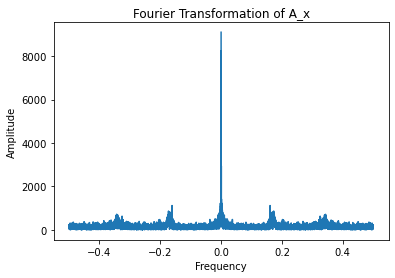

In [144]:
column_to_transform = 'A_x'

# Get the data from the selected column
column_data = merged_all[column_to_transform].values

# Apply Fourier transformation
transformed_data = np.fft.fft(column_data)

# Calculate the frequencies corresponding to the transformed data
frequencies = np.fft.fftfreq(len(column_data))

# Plot the Fourier transformation
plt.plot(frequencies, np.abs(transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of {}'.format(column_to_transform))
plt.show()

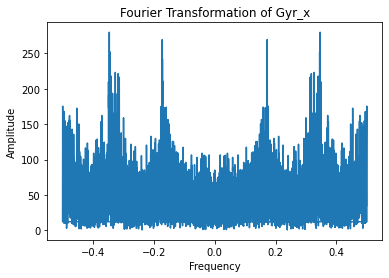

In [145]:
column_to_transform = 'Gyr_x'

# Get the data from the selected column
column_data = merged_all[column_to_transform].values

# Apply Fourier transformation
transformed_data = np.fft.fft(column_data)

# Calculate the frequencies corresponding to the transformed data
frequencies = np.fft.fftfreq(len(column_data))

# Plot the Fourier transformation
plt.plot(frequencies, np.abs(transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of {}'.format(column_to_transform))
plt.show()

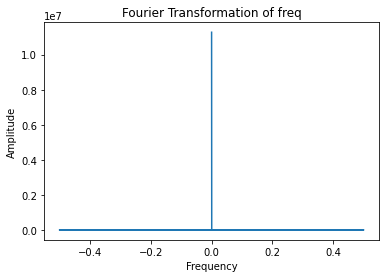

In [147]:
column_to_transform = 'freq'

# Get the data from the selected column
column_data = merged_all[column_to_transform].values

# Apply Fourier transformation
transformed_data = np.fft.fft(column_data)

# Calculate the frequencies corresponding to the transformed data
frequencies = np.fft.fftfreq(len(column_data))

# Plot the Fourier transformation
plt.plot(frequencies, np.abs(transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of {}'.format(column_to_transform))
plt.show()

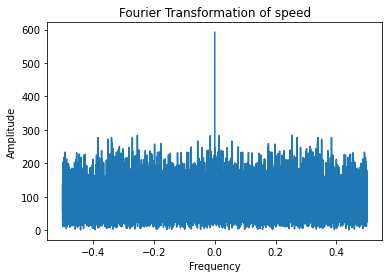

In [146]:
column_to_transform = 'speed'

# Get the data from the selected column
column_data = merged_all[column_to_transform].values

# Apply Fourier transformation
transformed_data = np.fft.fft(column_data)

# Calculate the frequencies corresponding to the transformed data
frequencies = np.fft.fftfreq(len(column_data))

# Plot the Fourier transformation
plt.plot(frequencies, np.abs(transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of {}'.format(column_to_transform))
plt.show()

In [28]:
X = merged_all.drop('state', axis=1)
y = merged_all['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

## NB

In [12]:
GB = GaussianNB()

In [13]:
GB.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = GB.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9857274401473296


In [16]:
#get F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9857493097681556

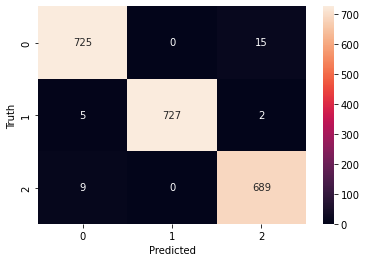

In [17]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## KNN

In [29]:
def train_knn(X_train, y_train):
    from matplotlib import pyplot as plt
    parameter = {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15]}
    knn = KNeighborsClassifier()

    clf = GridSearchCV(knn, parameter, cv=5, n_jobs=5)
    clf.fit(X_train, y_train)

    print(f'The best K value is：{(clf.best_params_)["n_neighbors"]}', "Acc：%.2f" % clf.best_score_)

    return clf

def get_output():
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    knn = train_knn(X_train, y_train)
    print("The score for kNN without cross val and without using smote is")
    print("Training set: {:6.2f}%".format(100 * knn.score(X_train, y_train)))
    print("Test set: {:6.2f}%".format(100 * knn.score(X_test, y_test)))
    # prediction
    y_pred_KNN = knn.predict(X_test)
    print("F1:",f1_score(y_test, y_pred_KNN, average='weighted'))



In [30]:
get_output()

The best K value is：5 Acc：0.99
The score for kNN without cross val and without using smote is
Training set:  98.99%
Test set:  98.57%
F1: 0.9856993296983566
